## Edge Detection

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage.filters import convolve1d, correlate1d

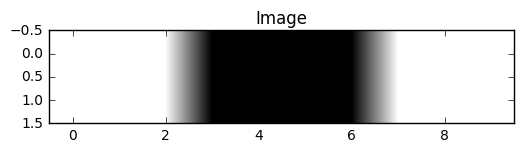

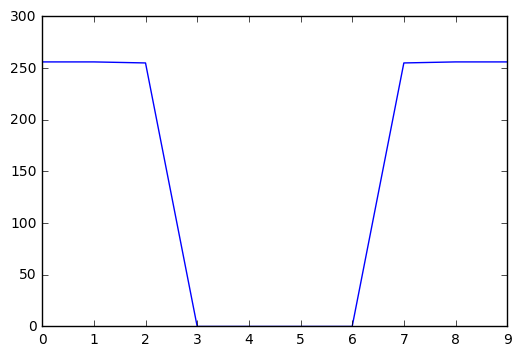

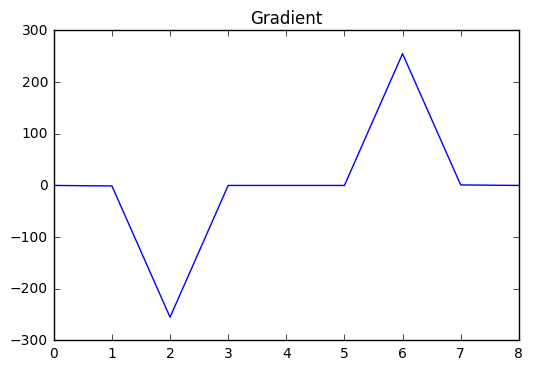

In [4]:
black = np.zeros((2,2))
white = np.ones((2,2))+255
white_black_transition = np.ones((2,2))*np.linspace(255,0,2)

img = np.append(np.append(np.append(np.append(white,white_black_transition,axis=1),black,axis=1),white_black_transition[:,::-1],axis=1),white,axis=1)

plt.imshow(img,cmap='gray'), plt.title('Image'),plt.show()

plt.plot(np.arange(img.shape[1]),img[0,:])
plt.show()

plt.plot(np.arange(img.shape[1]-1),np.diff(img[0,:],1));plt.title('Gradient');plt.show()

In [5]:
def plot_edges(img, plt, plot_all=True):
    sx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
    sy = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

    gx = cv2.filter2D(img,-1,sx)
    gy = cv2.filter2D(img,-1,sy)
    g = np.linalg.norm(np.dstack((gx,gy)),axis=2)

    if plot_all:
        plt.close('all')

        plt.figure(figsize=(8,8))
        plt.subplot(2,2,1)
        plt.imshow(gx, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('gx')

        plt.subplot(2,2,2)
        plt.imshow(gy, cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('gy')

        plt.subplot(2,2,3)
        plt.imshow(img,cmap='gray'), plt.xticks([]), plt.yticks([]), plt.title('Image')

        plt.subplot(2,2,4)
        plt.imshow(g, cmap='gray'),plt.xticks([]), plt.yticks([]), plt.title('Edges')
    
        plt.tight_layout()
        plt.show()    
    else:
        plt.imshow(g, cmap='gray'),plt.xticks([]), plt.yticks([]), plt.title('Edges')

## Original Image

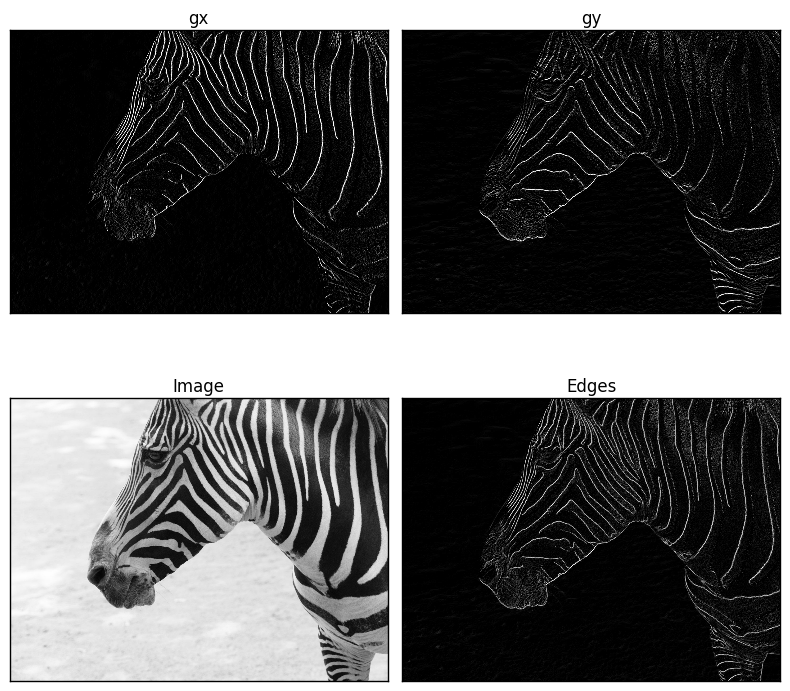

In [6]:
img = cv2.imread('images/zebra.jpg',0)
plot_edges(img, plt)

## Noisy Image

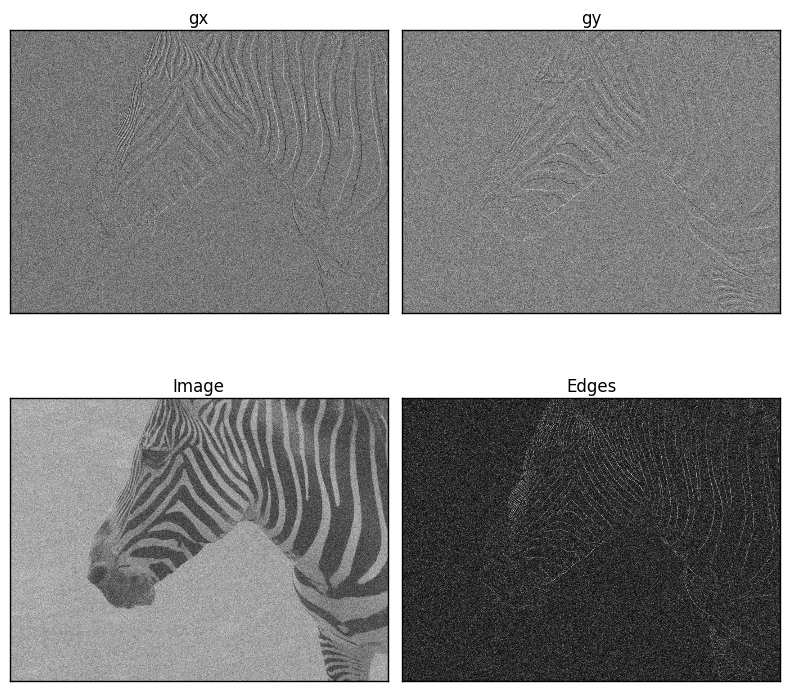

In [7]:
noise = np.random.randn(*img.shape)*40 # N(0, 30)
noisy_image = img+noise
plot_edges(noisy_image, plt)

## Edge detection on gaussian Blurred Noisy Image

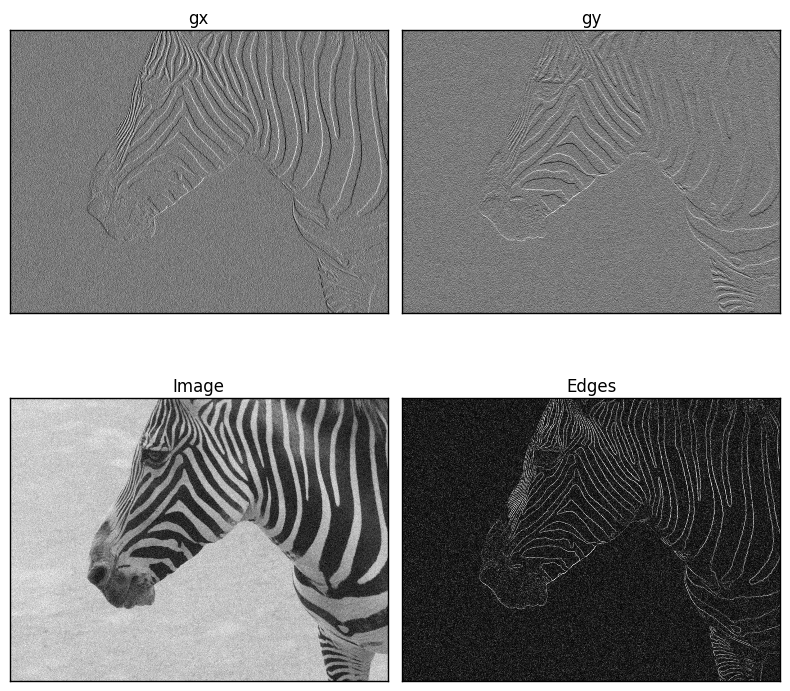

In [8]:
blured_img = cv2.GaussianBlur(noisy_image, (5,5), 1)
plot_edges(blured_img, plt)

## Canny Edge detector

In [9]:
edges = cv2.Canny(img,100,200)

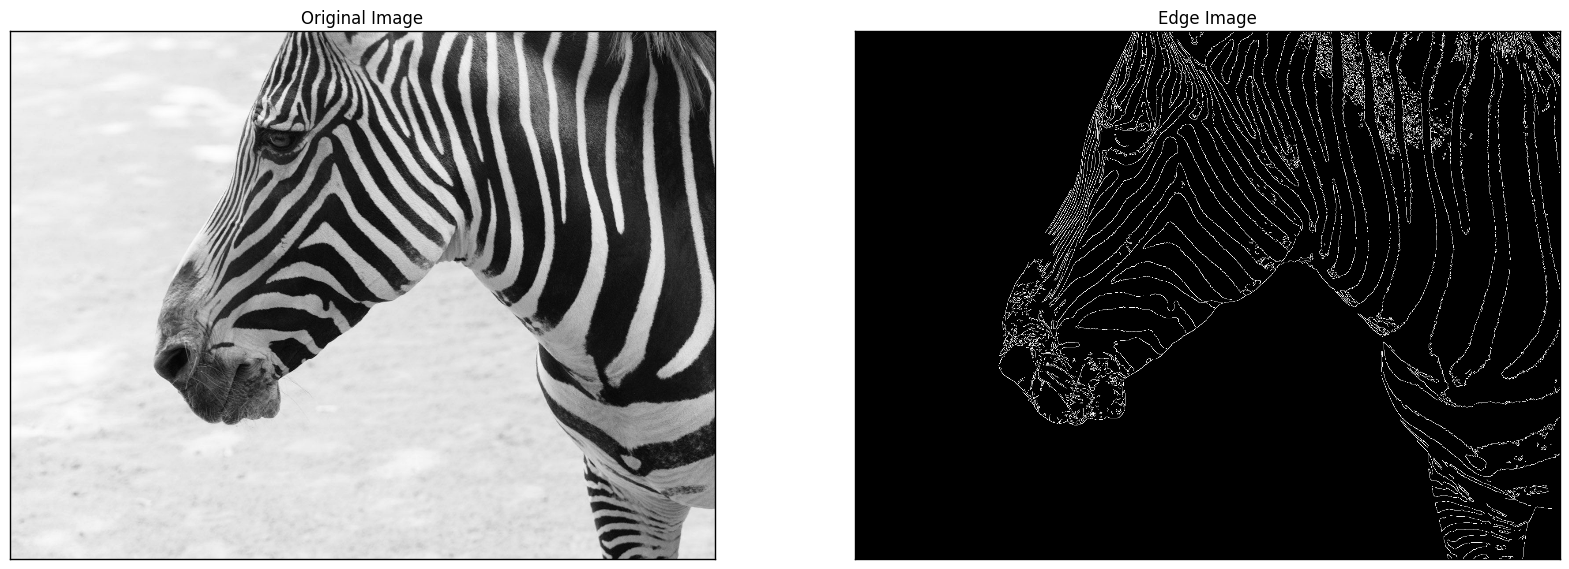

In [10]:
plt.close('all')
plt.figure(figsize=(20,20))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

## Convolution Properties

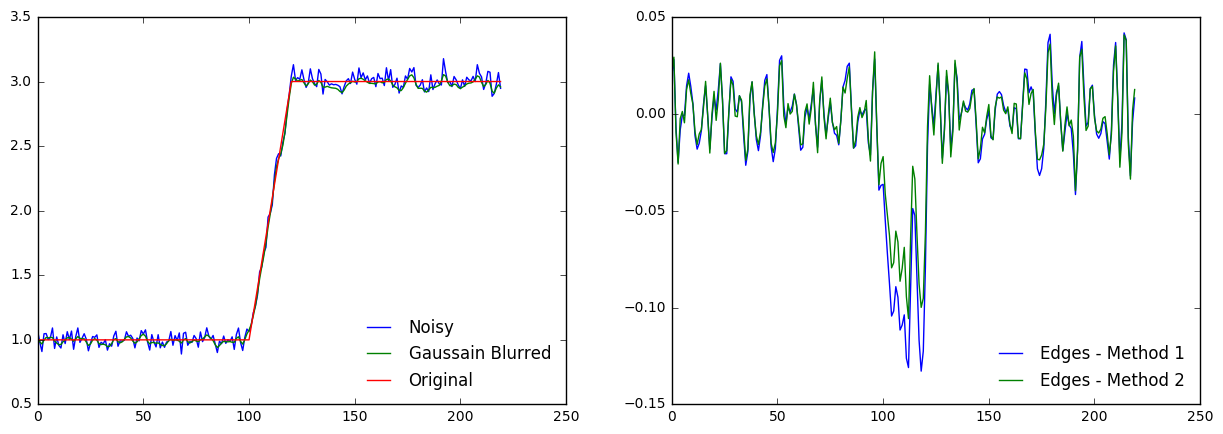

In [14]:
from scipy.stats import norm

plt.close('all')
f = np.array([1]*100+list(np.arange(1,3,0.1))+[3]*100)
# Add gaussian Noise
noisy_f = f+np.random.randn(len(f))*0.05
gx = [-0.5,0,0.5]
gf = norm(0,1).pdf(np.arange(-2,3,1))

# Method 1 d/dx(f * gf)
# Blur the image by using gaussian filter to supress noise
blurred_f = convolve1d(noisy_f,gf)
# Find the Gradients (d/dx)
g_1 = convolve1d(blurred_f,gx)
#plt.plot(g)

# Method 2 using the properties of convolution d/dx(gf)* f
gx_f = convolve1d(gf,gx)
g_2 = convolve1d(noisy_f,gx_f)

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(range(len(noisy_f)), noisy_f, label='Noisy')
plt.plot(range(len(blurred_f)), blurred_f, label='Gaussain Blurred')
plt.plot(range(len(f)), f, label='Original')
plt.legend(loc='lower right', frameon=False)


plt.subplot(1,2,2)
plt.plot(g_1, label='Edges - Method 1')
plt.plot(g_2, label='Edges - Method 2')

plt.legend(loc='lower right', frameon=False)
plt.show()

## 1D Gaussain Filter and its gradient

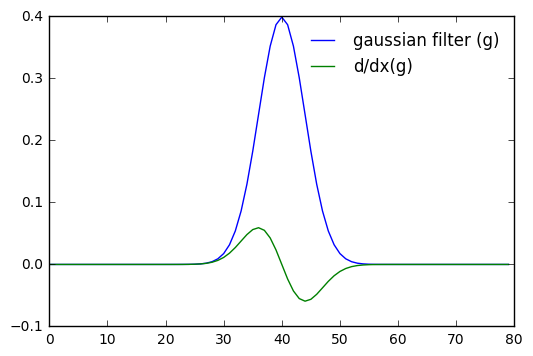

In [17]:
plt.close('all')
f = norm(0,1).pdf(np.arange(-10,10,0.25))
plt.plot(f, label='gaussian filter (g)')
g = correlate1d(f,gx,mode='constant', cval=0)
plt.plot(g, label='d/dx(g)')
plt.legend(frameon=False)
plt.show()

## Effect of $\sigma$ on edges

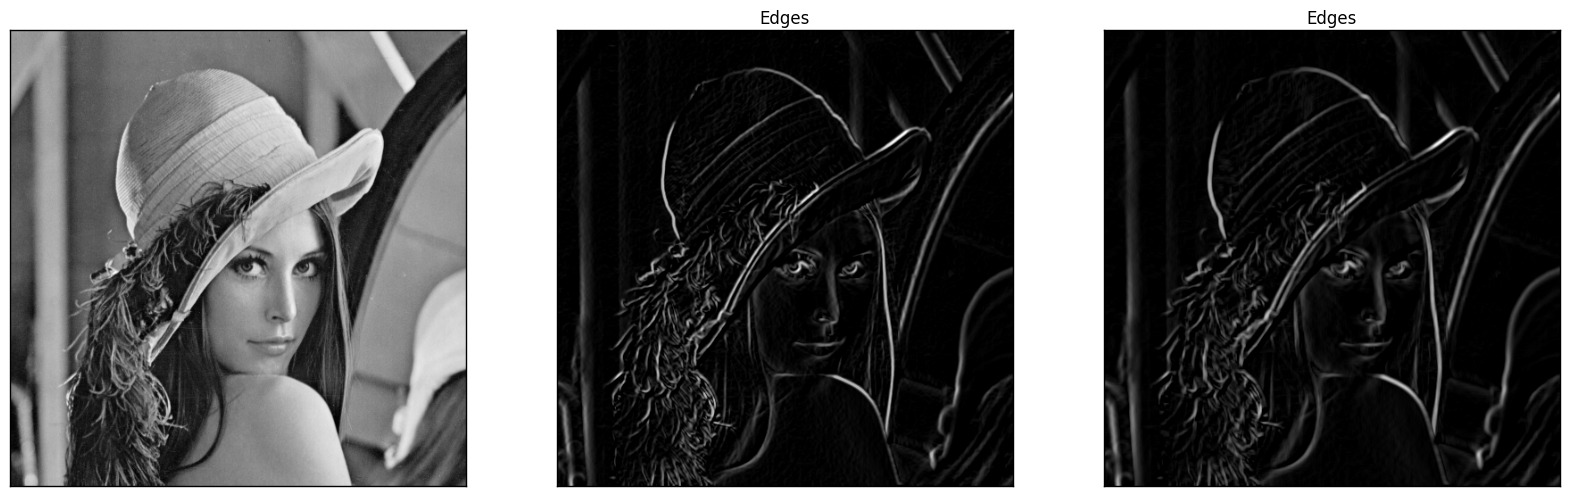

In [20]:
lena = cv2.imread('images/lena.png', 0)
plt.close('all')
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(lena, cmap='gray'), plt.xticks([]),plt.yticks([])
plt.subplot(1,3,2)
plot_edges(cv2.GaussianBlur(lena, (5,5), 1), plt, False)
plt.subplot(1,3,3)
plot_edges(cv2.GaussianBlur(lena, (5,5), 100), plt, False)
plt.show()